# Assignment 1

In [1]:
name = 'Andrey Popov' 
if name is None:
    raise ValueError("Put your full name in the `name` variable")

The objective of this assignment is to test a bunch of different topics we've discussed during our introductory classes. Complete the following exercises:

## Instructions

Complete the notebook and create a folder with your name, and put the notebook in that folder. Make a Pull Request with your code.

## Exercise 0

Write your own simple function with simple documentation and all types of arguments (positional, positional with defaults, arbitrary args, keyword args, arbitrary keyword args)

In [2]:
def my_function(pos1, pos2='default', *args, kw1, kw2='default_kw', **kwargs):
    """
    A sample function demonstrating different types of arguments.

    Parameters:
    pos1 (str): A required positional argument.
    pos2 (str, optional): A positional argument with a default value.
    *args: Arbitrary positional arguments.
    kw1 (int): A required keyword-only argument.
    kw2 (int, optional): A keyword-only argument with a default value.
    **kwargs: Arbitrary keyword arguments.

    Returns:
    dict: A dictionary containing all arguments and their values.
    """
    result = {
        'pos1': pos1,
        'pos2': pos2,
        'args': args,
        'kw1': kw1,
        'kw2': kw2,
        'kwargs': kwargs
    }
    return result

# Example usage
if __name__ == "__main__":
    output = my_function('value1', 'value2', 1, 2, 3, kw1=10, kw2=20, extra1='a', extra2='b')
    print(output)

{'pos1': 'value1', 'pos2': 'value2', 'args': (1, 2, 3), 'kw1': 10, 'kw2': 20, 'kwargs': {'extra1': 'a', 'extra2': 'b'}}


## Exercise 1


In [4]:
def is_prime(n):
    """
    Check if the number is prime or not.
    """
    # your code here
    if not isinstance(n, int):
        raise TypeError("Input must be an integer.")
    if n <= 1:
        return False
    if n <= 3:
        return True
    if n % 2 == 0 or n % 3 == 0:
        return False
    i = 5
    while i * i <= n:
        if n % i == 0 or n % (i + 2) == 0:
            return False
        i += 6
    return True

# Example usage
primes_dict = {x: is_prime(x) for x in range(20)}

# Print the dictionary
print(primes_dict)

{0: False, 1: False, 2: True, 3: True, 4: False, 5: True, 6: False, 7: True, 8: False, 9: False, 10: False, 11: True, 12: False, 13: True, 14: False, 15: False, 16: False, 17: True, 18: False, 19: True}


## Exercise 2

[Inspect](https://docs.python.org/3.7/library/inspect.html) will help you. Use `my_function` for tests.



In [11]:
import inspect

def inspect_function(func):
    """
    Takes another function as an argument (but not built-in) 
    and print the following data: 
    the name of the analyzed function, 
    the name of all the arguments it takes 
    and their types (positional, keyword, etc.)
    """
    # your code here
    if inspect.isbuiltin(func):
        raise ValueError("Built-in functions are not supported.")
    
    signature = inspect.signature(func)
    print(f"Function Name: {func.__name__}")
    print("Arguments:")
    
    for name, param in signature.parameters.items():
        if param.kind == inspect.Parameter.POSITIONAL_ONLY:
            arg_type = "Positional Only"
        elif param.kind == inspect.Parameter.POSITIONAL_OR_KEYWORD:
            arg_type = "Positional or Keyword"
        elif param.kind == inspect.Parameter.VAR_POSITIONAL:
            arg_type = "Arbitrary Positional (*args)"
        elif param.kind == inspect.Parameter.KEYWORD_ONLY:
            arg_type = "Keyword Only"
        elif param.kind == inspect.Parameter.VAR_KEYWORD:
            arg_type = "Arbitrary Keyword (**kwargs)"
        else:
            arg_type = "Unknown"
        print(f" - {name}: {arg_type}")



# Test usage
inspect_function(my_function)

Function Name: my_function
Arguments:
 - pos1: Positional or Keyword
 - pos2: Positional or Keyword
 - args: Arbitrary Positional (*args)
 - kw1: Keyword Only
 - kw2: Keyword Only
 - kwargs: Arbitrary Keyword (**kwargs)


## Exercise 3

The `my_time_now` function is not working correctly. Correct it so that it displays the current time with a message. 

In [8]:
from datetime import datetime
from time import sleep
 
# Corrected function
def my_time_now(msg, *, dt=datetime.now()):
    if dt is None:
        dt = datetime.now()
    print(f"{msg} {dt.strftime('%Y-%m-%d %H:%M:%S')}")
 


In [10]:
# simple tests :)
my_time_now('The time is now: ')
sleep(2)
my_time_now('The time is now: ')
sleep(2)
my_time_now('The time is now: ')

The time is now:  2025-01-15 11:13:19
The time is now:  2025-01-15 11:13:19
The time is now:  2025-01-15 11:13:19


## Exercise 4

In [12]:
def limit(input_generator, max_count):
    """
    Generator that returns not more than max_count values of the input_generator.
    """
    # your code here    
    count = 0
    for item in input_generator:
        if count >= max_count:
            break
        yield item
        count += 1

# Test usage
def sample_generator():
    i = 1
    while True:
        yield i
        i += 1

limited_gen = limit(sample_generator(), 5)
print(list(limited_gen))

[1, 2, 3, 4, 5]


## Exercise 5

Write a generator for an infinite sequence of numbers from the Pascal's triangle. The sequence look like this:
`1 1 1 1 2 1 1 3 3 1 1 4 6 4 1 1 5 10 10 5 1 1 6 15 20 15 6 1 1 7 21 35 35 21 7 1 1 8 28 56 70 56 28 8 1 1 9 36 84 126 126 84 36 9 1 ... '

Test it with a generator from the previous task)

In [13]:
# your code here
def pascals_triangle():
    """
    Generator that yields numbers from Pascal's triangle infinitely.

    Yields:
    int: The next number in Pascal's triangle sequence.
    """
    row = [1]
    while True:
        for num in row:
            yield num
        # Compute the next row
        row = [sum(pair) for pair in zip([0]+row, row+[0])]

# Example usage with limit from Exercise 4
limited_pascals = limit(pascals_triangle(), 20)
print(list(limited_pascals))

[1, 1, 1, 1, 2, 1, 1, 3, 3, 1, 1, 4, 6, 4, 1, 1, 5, 10, 10, 5]


## Exercise 6


In [25]:
import pathlib  # can change to os module if you want
import sys

def files_sorted_by_size(path_to_dir):
    """
    Return a list of files in path_to_dir sorted by size.
    The same size files sorted alphabetically
    """
    # your code here
    p = pathlib.Path(path_to_dir)
    if not p.is_dir():
        raise ValueError(f"{path_to_dir} is not a valid directory.")

    files = [f for f in p.iterdir() if f.is_file()]
    # Sort by size, then by name
    sorted_files = sorted(files, key=lambda x: (x.stat().st_size, x.name))
    return [f.name for f in sorted_files]


# Test usage
directory_path = r'D:\Personal\Education\MSc - PHDs\MIPT\1st term\SD with Python\python-software-dev-msai-main\python-software-dev-msai-main\assignments'
sorted_files = files_sorted_by_size(directory_path)
print(sorted_files)

['assignment_1.ipynb', 'assignment_2.ipynb']


## Exercise 7

Write a `merge_sorter` generator that merges sorted sequences of integers.

The generator takes an arbitrary number of arguments. The argument can be any iterable, including another generator. It is guaranteed that each argument is a sequence of integers, sorted in non-decreasing order.

In [27]:
def merge_sorter(*args):
    # your code here
    iterators = [iter(arg) for arg in args]
    current_values = []

    # Initialize current values
    for it in iterators:
        try:
            current_values.append(next(it))
        except StopIteration:
            current_values.append(None)

    while any(val is not None for val in current_values):
        # Find the minimum non-None value
        min_val = min(val for val in current_values if val is not None)
        yield min_val

        # Update the iterator that had the minimum value
        for idx, val in enumerate(current_values):
            if val == min_val:
                try:
                    current_values[idx] = next(iterators[idx])
                except StopIteration:
                    current_values[idx] = None
                break

# Test usage
if __name__ == "__main__":
    gen1 = iter([1, 4, 7, 10])
    gen2 = iter([2, 5, 8, 11])
    gen3 = iter([3, 6, 9, 12])
    merged = merge_sorter(gen1, gen2, gen3)
    limited_merged = limit(merged, 12)
    print(list(limited_merged))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


## Exercise 8

Write the decorator `proﬁler`, which, when calling a function, will store in its attributes (not to be confused with arguments) the time of its execution (in seconds, it can be fractional) and the number of recursive calls that occurred during execution. Name the attributes `last_time_taken` and `calls`.
It is forbidden to use global variables.
The decorator must behave in a decent manner, that is, it must not overwrite the function's documentation.

For tests write [Ackermann function](https://en.wikipedia.org/wiki/Ackermann_function)

In [79]:
import time

def profiler(func):
    # your code here
    """
    Decorator that profiles a function, storing execution time and number of recursive calls.

    Attributes:
    last_time_taken (float): Time taken for the last execution in seconds.
    calls (int): Number of recursive calls made during execution.

    Returns:
    The decorated function.
    """
    def wrapper(*args, **kwargs):
        # If this is the outermost call, start the timer and reset total_calls
        if wrapper.current_calls == 0:
            wrapper.start_time = time.time()
            wrapper.total_calls = 0  # Initialize total calls

        # Increment the total call count and current active calls
        wrapper.total_calls += 1
        wrapper.current_calls += 1

        # Execute the original function
        result = func(*args, **kwargs)

        # Decrement the current active calls
        wrapper.current_calls -= 1

        # If this is the outermost call, stop the timer and record time taken
        if wrapper.current_calls == 0:
            wrapper.last_time_taken = time.time() - wrapper.start_time

        return result

    # Initialize attributes
    wrapper.last_time_taken = 0.0
    wrapper.total_calls = 0
    wrapper.current_calls = 0

    # Manually preserve the original function's documentation and name
    wrapper.__doc__ = func.__doc__
    wrapper.__name__ = func.__name__

    # **Copy all non-special attributes from func to wrapper**
    for attr in dir(func):
        if not attr.startswith('__') and not hasattr(wrapper, attr):
            setattr(wrapper, attr, getattr(func, attr))

    return wrapper

    return wrapper

@profiler
def ackermann(n, m):
    # Code to compute the Ackermann function
    if n == 0:
        return m + 1
    elif m == 0:
        return ackermann(n - 1, 1)
    else:
        return ackermann(n - 1, ackermann(n, m - 1))
    
# Test usage
if __name__ == "__main__":
    try:
        result = ackermann(3, 4)
        print(f"Ackermann(3, 4) = {result}")
    except RecursionError:
        print("Recursion depth exceeded.")
    print(f"Last time taken: {ackermann.last_time_taken:.6f} seconds")
    print(f"Number of calls: {ackermann.total_calls}")

Ackermann(3, 4) = 125
Last time taken: 0.069001 seconds
Number of calls: 10307


## Exercise 9

Write the function `encode` that implements [run-length encoding](https://en.wikipedia.org/wiki/Run-length_encoding) algorithm

In [80]:
def encode(sequence):
    # your code here
    if not sequence:
        return []
    
    encoded = []
    prev = sequence[0]
    count = 1

    for item in sequence[1:]:
        if item == prev:
            count += 1
        else:
            encoded.append((prev, count))
            prev = item
            count = 1
    encoded.append((prev, count))
    return encoded

# Example usage
if __name__ == "__main__":
    seq = 'AAAABBBCCDAA'
    print(encode(seq))

[('A', 4), ('B', 3), ('C', 2), ('D', 1), ('A', 2)]


## Exercise 10

Write a decorator `visualizer` that takes a recursive function and will visualize the recursive calls that are made during the execution.
Consider using the `networkx` library or some other one in order to draw the recursion tree.
Test it with a recursive function that computes fibonacci.

In [81]:
@visualizer
def fibonacci(n):
    if n == 0 or n == 1:
        return n 
    return fibonacci(n-1) + fibonacci(n-2)

Fibonacci(5) = 5


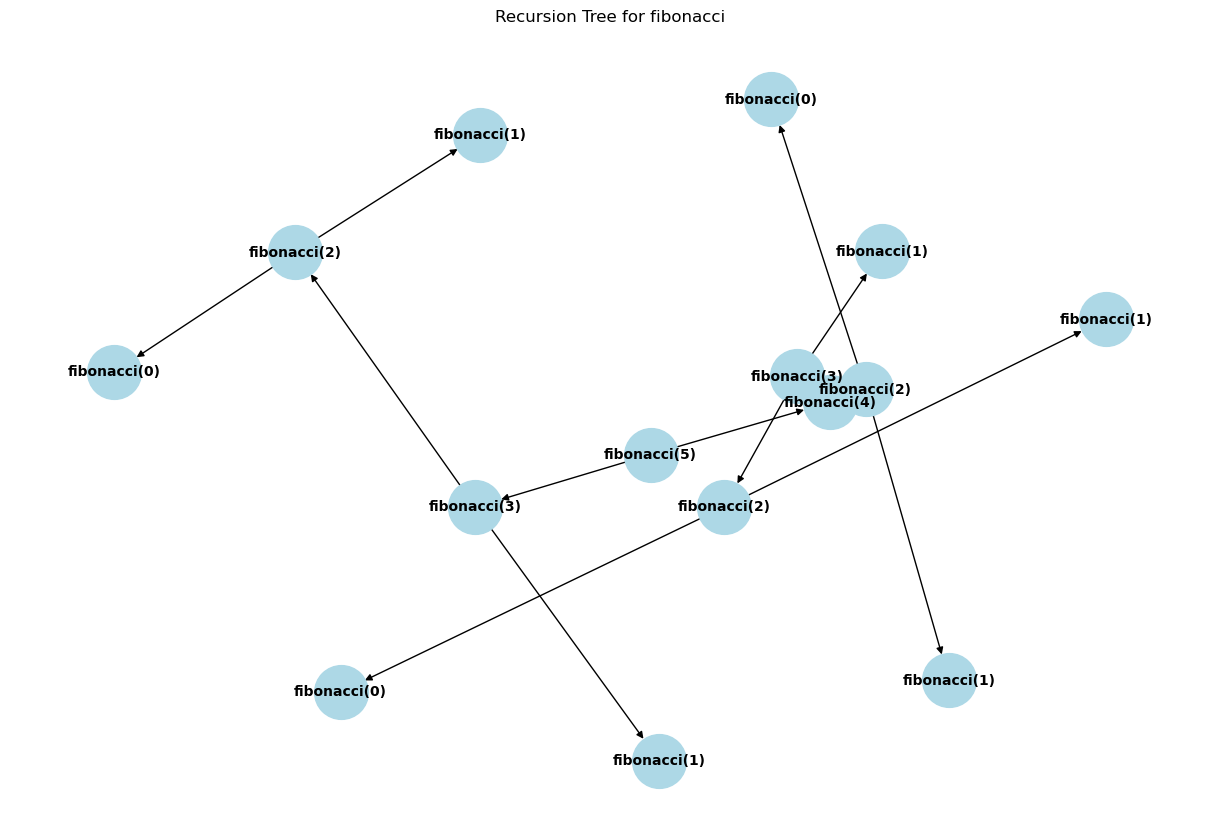

In [82]:
import networkx as nx
import matplotlib.pyplot as plt


def visualizer(func):
    # your code here
    def wrapper(*args, **kwargs):
        # If this is the outermost call, reset the graph and counter
        if not wrapper.call_stack:
            wrapper.graph = nx.DiGraph()
            wrapper.counter = 0

        # Assign a unique node ID
        node_id = wrapper.counter
        label = f"{func.__name__}({', '.join(map(str, args))})"

        # Add node to the graph
        wrapper.graph.add_node(node_id, label=label)

        # If there's a parent call, add an edge from parent to current node
        if wrapper.call_stack:
            parent_id = wrapper.call_stack[-1]
            wrapper.graph.add_edge(parent_id, node_id)

        # Push the current node ID onto the call stack
        wrapper.call_stack.append(node_id)
        wrapper.counter += 1

        # Execute the original function
        result = func(*args, **kwargs)

        # Pop the current node ID from the call stack after execution
        wrapper.call_stack.pop()

        return result

    # Initialize attributes
    wrapper.graph = nx.DiGraph()
    wrapper.counter = 0
    wrapper.call_stack = []

    # Define the method to draw the recursion tree
    def draw_graph():
        """
        Draws the recursion tree using matplotlib.
        """
        if not wrapper.graph:
            print("No recursion to visualize.")
            return

        # Attempt to use a hierarchical layout; fallback to spring layout if not available
        try:
            pos = nx.nx_pydot.graphviz_layout(wrapper.graph, prog='dot')
        except:
            pos = nx.spring_layout(wrapper.graph)

        labels = nx.get_node_attributes(wrapper.graph, 'label')
        plt.figure(figsize=(12, 8))
        nx.draw(wrapper.graph, pos, labels=labels, with_labels=True,
                arrows=True, node_size=1500, node_color='lightblue',
                font_size=10, font_weight='bold')
        plt.title(f"Recursion Tree for {func.__name__}")
        plt.axis('off')  # Hide the axes
        plt.show()

    # Attach the draw_graph method to the wrapper
    wrapper.draw_graph = draw_graph

    # Manually preserve the original function's documentation and name
    wrapper.__doc__ = func.__doc__
    wrapper.__name__ = func.__name__

    return wrapper

# Example usage
if __name__ == "__main__":
    fib_number = fibonacci(5)
    print(f"Fibonacci(5) = {fib_number}")
    fibonacci.draw_graph()

## Exercise 11

Now write a decorator `memoizer` that will do caching on the calls of a function (memoization). 
Decorate fibonacci with the decorators `memoizer`, `profiler` and `visualizer` at the same time (not necessarily in that order). Test that they're working as one would expect.

Fibonacci(10) = 55
Last time taken: 0.000000 seconds
Number of calls: 0


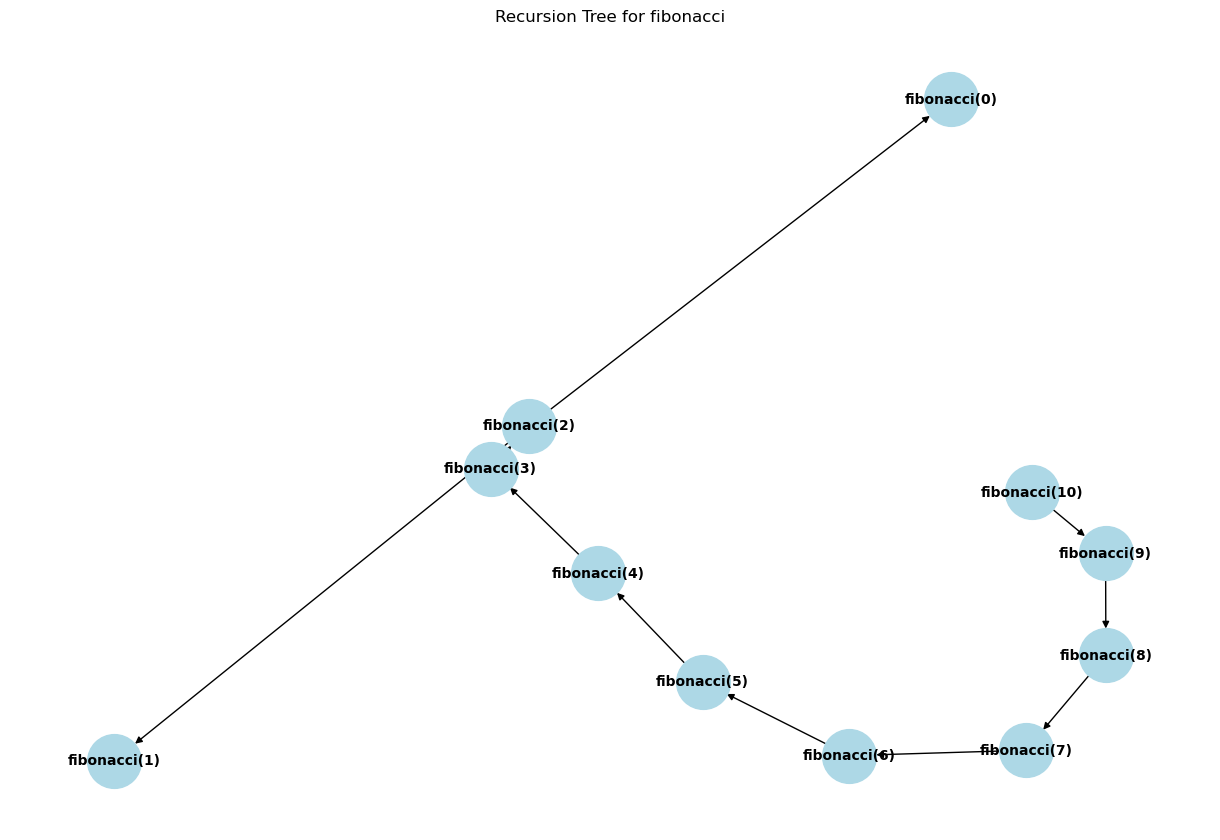

In [83]:

def memoizer(func):
    # your code here
    cache = {}
    
    def wrapper(*args, **kwargs):
        # Create a hashable key from args and kwargs
        key = (args, tuple(sorted(kwargs.items())))
        if key not in cache:
            cache[key] = func(*args, **kwargs)
        return cache[key]
    
    # Attach the cache to the wrapper for potential inspection
    wrapper.cache = cache

    # Manually preserve the original function's documentation and name
    wrapper.__doc__ = func.__doc__
    wrapper.__name__ = func.__name__

    # Copy all non-special attributes from func to wrapper
    for attr in dir(func):
        if not attr.startswith('__') and not hasattr(wrapper, attr):
            setattr(wrapper, attr, getattr(func, attr))
    
    return wrapper


@memoizer
@profiler
@visualizer
def fibonacci(n):
    """
    Compute the nth Fibonacci number recursively.

    Parameters:
    n (int): The position in the Fibonacci sequence.

    Returns:
    int: The nth Fibonacci number.
    """
    if n == 0:
        return 0
    elif n == 1:
        return 1
    else:
        return fibonacci(n-1) + fibonacci(n-2)


# Example usage
if __name__ == "__main__":
    fib_number = fibonacci(10)
    print(f"Fibonacci(10) = {fib_number}")
    print(f"Last time taken: {fibonacci.last_time_taken:.6f} seconds")
    print(f"Number of calls: {fibonacci.total_calls}")
    fibonacci.draw_graph()

## Exercise 12

By using the `isinstance` method, check whether the following objects belong to the proposed types (hint: `isinstance`).

Visualize this correspondance matrix (object – type), e.g. using numpy and [pcolormesh](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pcolormesh.html) for visualization.

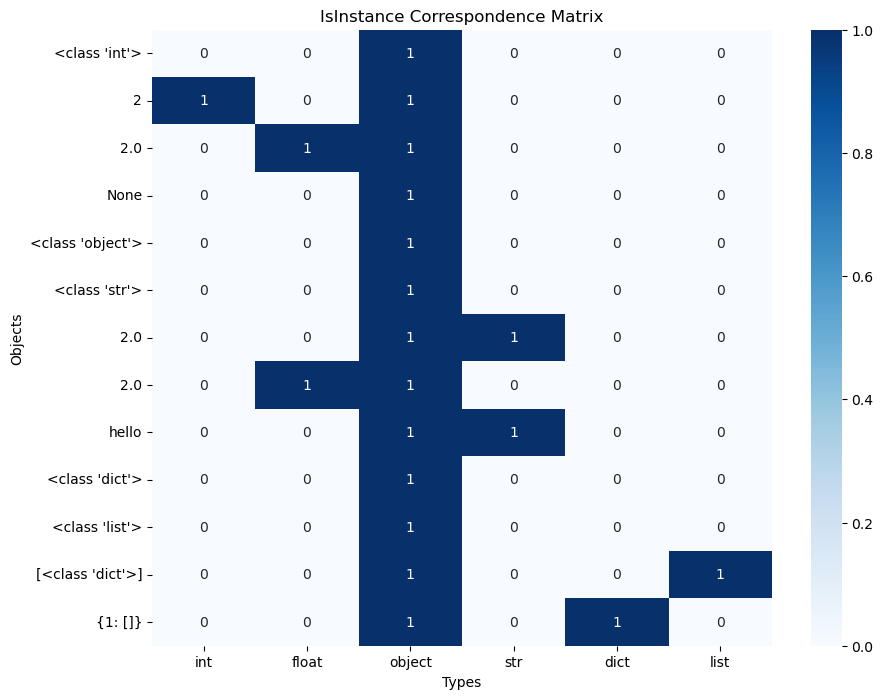

In [23]:
list_of_objects = [
    int,
    2,
    2.,
    None,
    object,
    str,
    str(2.),
    float('2.0'),
    'hello',
    dict,
    list,
    [dict],
    {1: []}
]

list_of_types = [
    int,
    float,
    object,
    str,
    dict,
    list
]


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_isinstance(list_of_objects, list_of_types):
    """
    Check isinstance for each object against each type and visualize the results.

    Parameters:
    list_of_objects (list): List of objects to check.
    list_of_types (list): List of types to check against.

    Returns:
    None
    """
    matrix = np.zeros((len(list_of_objects), len(list_of_types)), dtype=int)
    
    for i, obj in enumerate(list_of_objects):
        for j, typ in enumerate(list_of_types):
            matrix[i, j] = isinstance(obj, typ)
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues",
                xticklabels=[t.__name__ for t in list_of_types],
                yticklabels=[str(obj) for obj in list_of_objects])
    plt.xlabel('Types')
    plt.ylabel('Objects')
    plt.title('IsInstance Correspondence Matrix')
    plt.show()


if __name__ == "__main__":
    visualize_isinstance(list_of_objects, list_of_types)